yt : [INFO     ] 2024-08-24 20:24:30,775 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-24 20:24:30,775 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 20:24:30,794 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-24 20:24:30,795 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 20:24:30,795 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 20:24:30,796 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 20:24:30,796 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 20:24:30,796 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-24 20:24:30,796 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 20:24:30,796 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 20:24:30,796 Parameters: omega_radiation  

Text(0, 0.5, 'kpc')

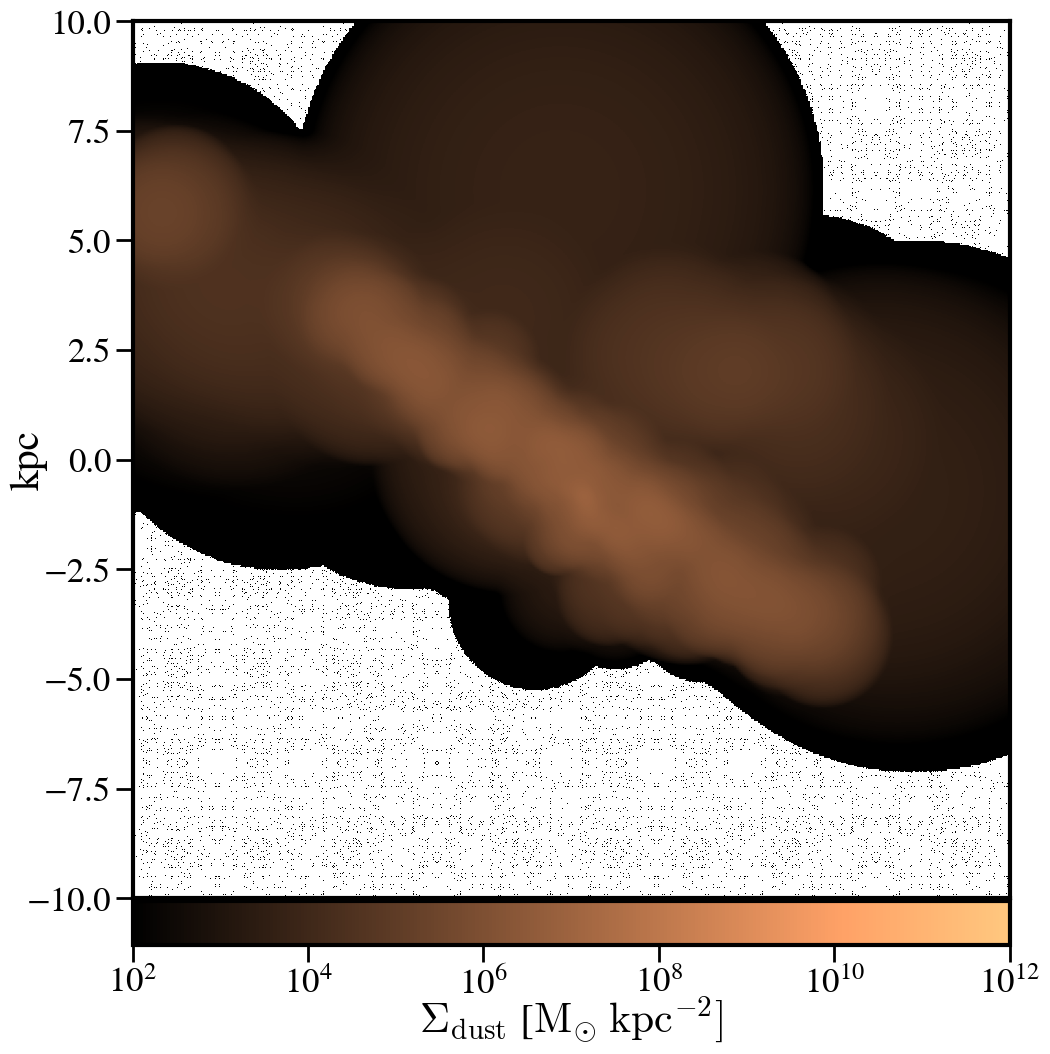

In [45]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[6]

#i want to plot the dust mass surface densities for the most massive halo in the current snapshot, so:
dust_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
#note we have to do some clunky unit declaration first because the simba dust masses are indeed in code_mass but yt doesn't know that
dust_mass = ds.arr(ad['PartType0', 'Dust_Masses'][gal.glist], 'code_mass').in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

extent=10 #this is like the 'width' parameter in yt projection plots
#this attempts to set the viewing angle with respect to the rotation axis of the galaxy disk
#but can be messed up for galaxies that are not quite disky yet
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta)) #the meaning of these params is defined later
p = np.rad2deg(np.arccos(cos_phi))

#first, we tell sphviewer where our particles are
P = sph.Particles(dust_pos*0.68, dust_mass*0.68) #factors of little h float everywhere :(

#second, sphviewer sets up a camera object, using the above viewing angle params
#t = theta, p = phi, and are defined in spherical coordinates (i think) w.r.t the simulation box
#r is the radial distance from the center at (x,y,z) = hcoord.
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=t, p=p, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
#and these two actually generate the image array
S = sph.Scene(P, Camera=C)
R = sph.Render(S)
img_dust = R.get_image()

#and plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
vmin, vmax = 1e2, 1e12 #some educated guess as to 'good' array limits to get nice contrast in the plot
cNorm  = colors.LogNorm(vmin=vmin,vmax=vmax)
time = obj.simulation.time.in_units('Myr')
sm1 = ax1.imshow(img_dust, extent=[-extent,extent,-extent,extent],cmap=cm.copper, norm=cNorm)
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)
#ax1.annotate(f't = {time:.2f}',(-4,4),color='white',fontsize=20)

yt : [INFO     ] 2024-08-24 20:24:20,143 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-24 20:24:20,144 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 20:24:20,163 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-24 20:24:20,163 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 20:24:20,165 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 20:24:20,165 Parameters: omega_radiation  

Text(0, 0.5, 'kpc')

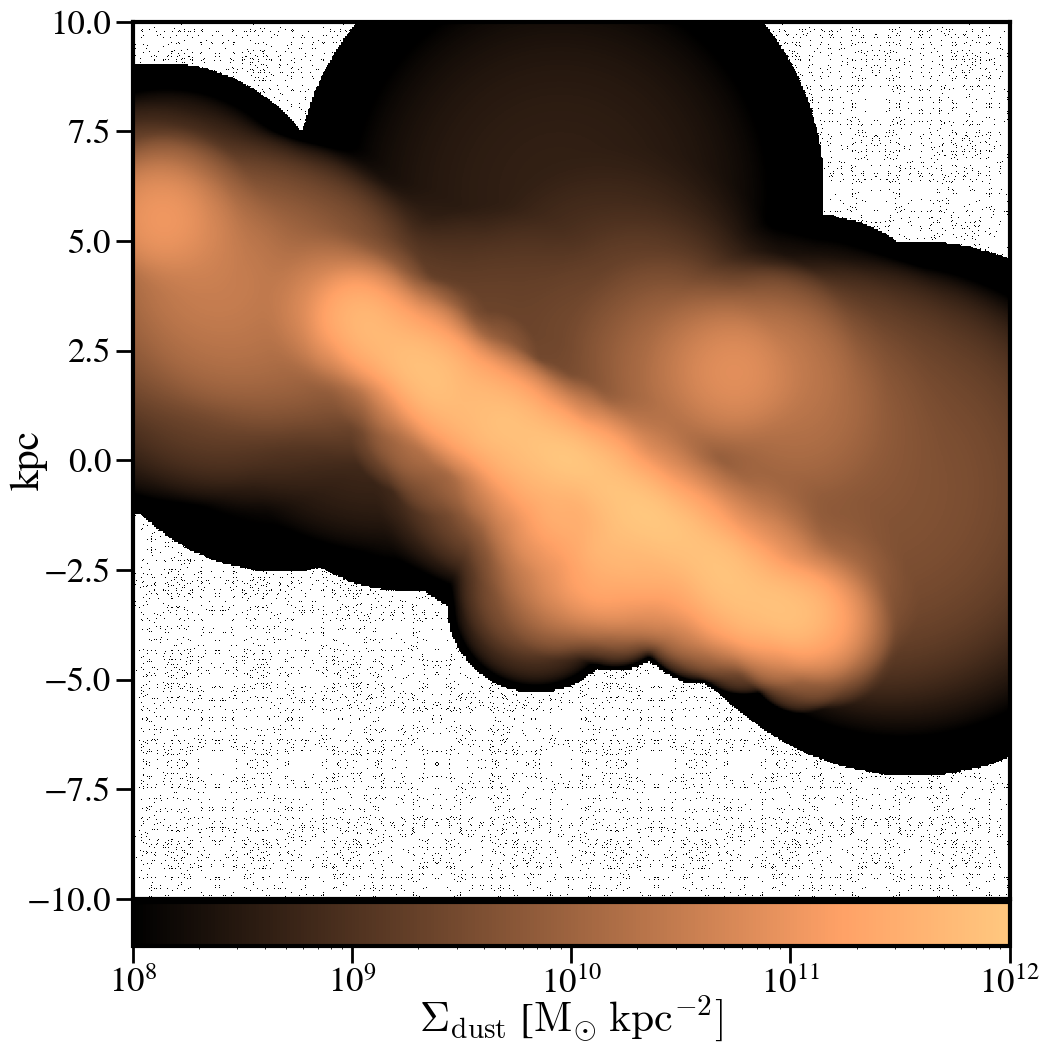

In [44]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[6]

#i want to plot the dust mass surface densities for the most massive halo in the current snapshot, so:
dust_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
#note we have to do some clunky unit declaration first because the simba dust masses are indeed in code_mass but yt doesn't know that
dust_mass = ds.arr(ad['PartType0', 'GrackleHI'][gal.glist], 'code_mass').in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

extent=10 #this is like the 'width' parameter in yt projection plots
#this attempts to set the viewing angle with respect to the rotation axis of the galaxy disk
#but can be messed up for galaxies that are not quite disky yet
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta)) #the meaning of these params is defined later
p = np.rad2deg(np.arccos(cos_phi))

#first, we tell sphviewer where our particles are
P = sph.Particles(dust_pos*0.68, dust_mass*0.68) #factors of little h float everywhere :(
#second, sphviewer sets up a camera object, using the above viewing angle params
#t = theta, p = phi, and are defined in spherical coordinates (i think) w.r.t the simulation box
#r is the radial distance from the center at (x,y,z) = hcoord.
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=t, p=p, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
#and these two actually generate the image array
S = sph.Scene(P, Camera=C)
R = sph.Render(S)
img_dust = R.get_image()

#and plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
vmin, vmax = 1e8, 1e12 #some educated guess as to 'good' array limits to get nice contrast in the plot
cNorm  = colors.LogNorm(vmin=vmin,vmax=vmax)
time = obj.simulation.time.in_units('Myr')
sm1 = ax1.imshow(img_dust, extent=[-extent,extent,-extent,extent],cmap=cm.copper, norm=cNorm)
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)
#ax1.annotate(f't = {time:.2f}',(-4,4),color='white',fontsize=20)

In [40]:
cs = sb.get_caesar(125)
print(sb.get_z_from_snap(125))
h1 = np.asarray([i.masses['dust'] for i in cs.galaxies])
m1 = np.asarray([i.masses['stellar'] for i in cs.galaxies])
w = np.where(h1>1e8)[0]
z = np.where(m1>1e11)[0]
print(w, z)

yt : [INFO     ] 2024-08-24 20:23:10,542 Opening /media/lorenzong/Data1/simba_hig_res/m25n512_125.hdf5
yt : [INFO     ] 2024-08-24 20:23:10,551 Found 261717 halos
yt : [INFO     ] 2024-08-24 20:23:10,558 Found 5246 galaxies


0.49043513253694404
[  0   1   3   6   8   9  11  12  13  16  21  25  28  33  34  37  42  45
  47  48  49  50  57  65  74 120] [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [32]:
m1[500]


3925775616.0

In [33]:
dust_mass.max()

13897914220.30505

yt : [INFO     ] 2024-08-24 20:24:09,320 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-24 20:24:09,321 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 20:24:09,340 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-24 20:24:09,340 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 20:24:09,341 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 20:24:09,341 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: omega_radiation  

Text(0, 0.5, 'kpc')

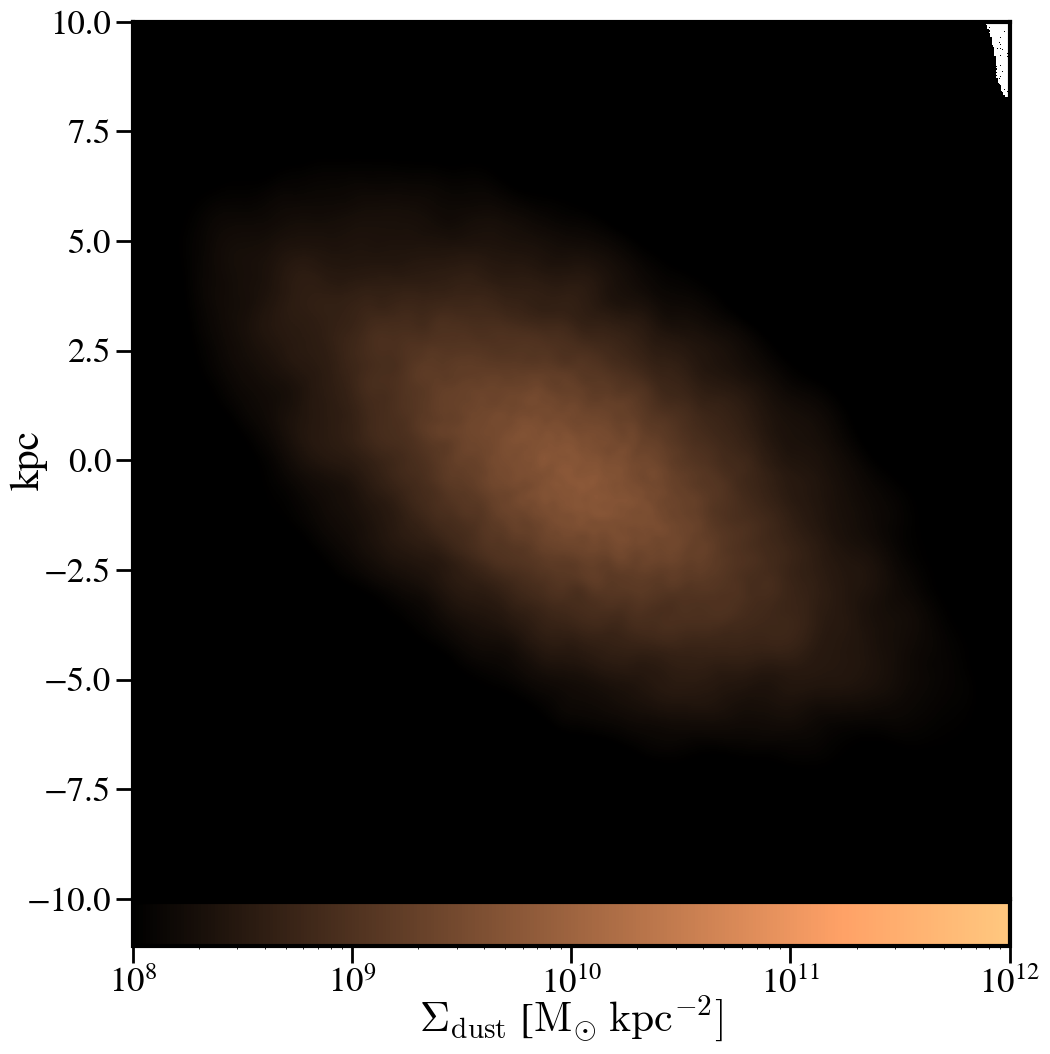

In [43]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[6]

#i want to plot the dust mass surface densities for the most massive halo in the current snapshot, so:
dust_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
#note we have to do some clunky unit declaration first because the simba dust masses are indeed in code_mass but yt doesn't know that
dust_mass = ad['PartType4', 'Masses'][gal.slist].in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

extent=10 #this is like the 'width' parameter in yt projection plots
#this attempts to set the viewing angle with respect to the rotation axis of the galaxy disk
#but can be messed up for galaxies that are not quite disky yet
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta)) #the meaning of these params is defined later
p = np.rad2deg(np.arccos(cos_phi))

#first, we tell sphviewer where our particles are
P = sph.Particles(dust_pos*0.68, dust_mass*0.68) #factors of little h float everywhere :(
#second, sphviewer sets up a camera object, using the above viewing angle params
#t = theta, p = phi, and are defined in spherical coordinates (i think) w.r.t the simulation box
#r is the radial distance from the center at (x,y,z) = hcoord.
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=t, p=p, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
#and these two actually generate the image array
S = sph.Scene(P, Camera=C)
R = sph.Render(S)
img_dust = R.get_image()

#and plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
vmin, vmax = 1e8, 1e12 #some educated guess as to 'good' array limits to get nice contrast in the plot
cNorm  = colors.LogNorm(vmin=vmin,vmax=vmax)
time = obj.simulation.time.in_units('Myr')
sm1 = ax1.imshow(img_dust, extent=[-extent,extent,-extent,extent],cmap=cm.copper, norm=cNorm)
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)
#ax1.annotate(f't = {time:.2f}',(-4,4),color='white',fontsize=20)

yt : [INFO     ] 2024-08-24 21:35:58,267 Calculating time from 4.661e-01 to be 1.695e+17 seconds
yt : [INFO     ] 2024-08-24 21:35:58,267 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 21:35:58,286 Parameters: current_time              = 1.694799870056887e+17 s
yt : [INFO     ] 2024-08-24 21:35:58,287 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 21:35:58,287 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 21:35:58,288 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 21:35:58,288 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 21:35:58,288 Parameters: current_redshift          = 1.145471554829339
yt : [INFO     ] 2024-08-24 21:35:58,289 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 21:35:58,289 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 21:35:58,289 Parameters: omega_radiation      

Text(0, 0.5, 'kpc')

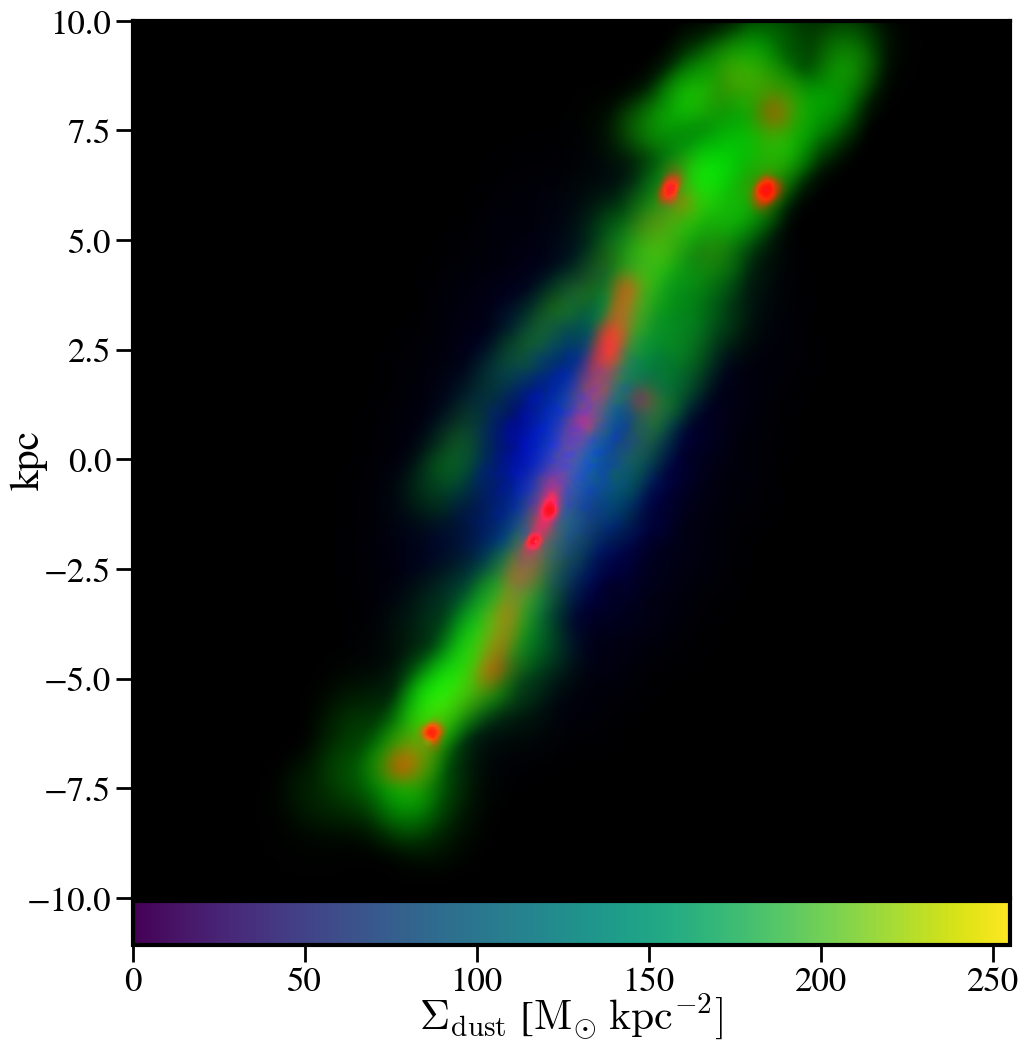

In [70]:
import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (12,12),  # Adjust figure size if needed
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

# Load your data
sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(100)
catfile  = sb.get_caesar_file(100)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[1]

# Dust Data
dust_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
dust_mass = ds.arr(ad['PartType0', 'GrackleHII'][gal.glist], 'code_mass').in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

# Gas Data
gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
gas_mass = ds.arr(ad['PartType0', 'GrackleHI'][gal.glist], 'code_mass').in_units('Msun').value

# star Data
star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
star_mass = ad['PartType4', 'Masses'][gal.slist].in_units('Msun').value

extent = 10  # Width parameter for projection plots

# Set viewing angle based on galaxy rotation
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0, 1, 0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta))  # theta
p = np.rad2deg(np.arccos(cos_phi))    # phi

# Dust Particles
P_dust = sph.Particles(dust_pos*0.68, dust_mass*0.68)

# Gas Particles
P_gas = sph.Particles(gas_pos*0.68, gas_mass*0.68)

P_star = sph.Particles(star_pos*0.68, star_mass*0.68)

# Camera setup
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68, r='infinity', t=t, p=p, roll=0, extent=[-extent, extent, -extent, extent], xsize=400, ysize=400)

# Render Dust Image
S_dust = sph.Scene(P_dust, Camera=C)
R_dust = sph.Render(S_dust)
img_dust = R_dust.get_image()

# Render Gas Image
S_gas = sph.Scene(P_gas, Camera=C)
R_gas = sph.Render(S_gas)
img_gas = R_gas.get_image()

# Render Star Image
S_star = sph.Scene(P_star, Camera=C)
R_star = sph.Render(S_star)
img_star = R_star.get_image()

# Normalize images to [0, 1]
def normalize_image(img, vmin, vmax):
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    return norm(img)

# vmin_dust, vmax_dust = 1e7, 1e13  # Dust normalization limits
# vmin_gas, vmax_gas = 1e7, 1e13    # Gas normalization limits
# vmin_star, vmax_star = 1e4, 1e11 

vmin_dust, vmax_dust = np.percentile(img_dust, [1, 99])
vmin_gas, vmax_gas = np.percentile(img_gas, [1, 99])
vmin_star, vmax_star = np.percentile(img_star, [1, 99])

norm_dust = normalize_image(img_dust, vmin_dust, vmax_dust)
norm_gas = normalize_image(img_gas, vmin_gas, vmax_gas)
norm_star = normalize_image(img_star, vmin_star, vmax_star)

# # Create RGB image
# rgb_image = np.zeros((img_dust.shape[0], img_dust.shape[1], 3))
# rgb_image[..., 0] = img_dust  # Red channel for dust
# rgb_image[..., 1] = img_gas  
# rgb_image[..., 2] = img_star  

from astropy.visualization import make_lupton_rgb
rgb_image = make_lupton_rgb(norm_dust, norm_gas, norm_star, Q=10, stretch=0.5, filename="test_rgb.jpeg")

# # Plot the RGB image
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))

sm1 = ax1.imshow(rgb_image, extent=[-extent, extent, -extent, extent])
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)

yt : [INFO     ] 2024-08-25 13:38:59,066 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-25 13:38:59,067 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-25 13:38:59,100 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-25 13:38:59,100 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-25 13:38:59,101 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-25 13:38:59,101 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: omega_radiation     

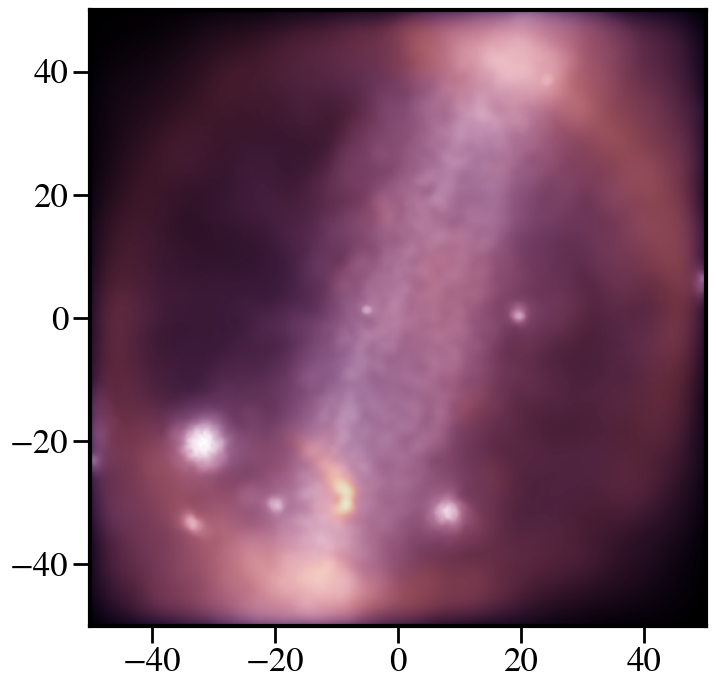

In [3]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sphviewer.tools import QuickView
from sphviewer.tools import Blend


import modules as anal
import modules.anal_func as anal_func

plt.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

def get_normalized_image(image, vmin=None, vmax=None):
    if(vmin == None):
        vmin = np.min(image)
    if(vmax == None):
        vmax = np.max(image)

    image = np.clip(image, vmin, vmax)
    image = (image-vmin)/(vmax-vmin)

    return image

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/particles_within_aperture.h5'
ds = yt.load(subset)
#ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()



gal = obj.galaxies[10]
# gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
# star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
gas_pos = ad['PartType0', 'Coordinates'].in_units('kpc').value
star_pos = ad['PartType4', 'Coordinates'].in_units('kpc').value

hcoord = gal.minpotpos.in_units('kpc').value

extent=50 #this is like the 'width' parameter in yt projection plots
qv_gas = QuickView(gas_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], t=60)
qv_star = QuickView(star_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], t=60)

img_gas  = qv_gas.get_image()
img_star  = qv_star.get_image()

rgb_gas  = cm.magma(get_normalized_image(img_gas))
rgb_star = cm.Greys_r(get_normalized_image(img_star))

blend = Blend.Blend(rgb_star,rgb_gas)
output = blend.Overlay()
plt.imshow(output, extent=qv_star.get_extent())
plt.imsave('test_overlay.png', output)

In [4]:
qv = QuickView(dust_pos, r='infinity', plot=False)
qv.imshow(cmap="inferno_r")

NameError: name 'dust_pos' is not defined

Done animation!


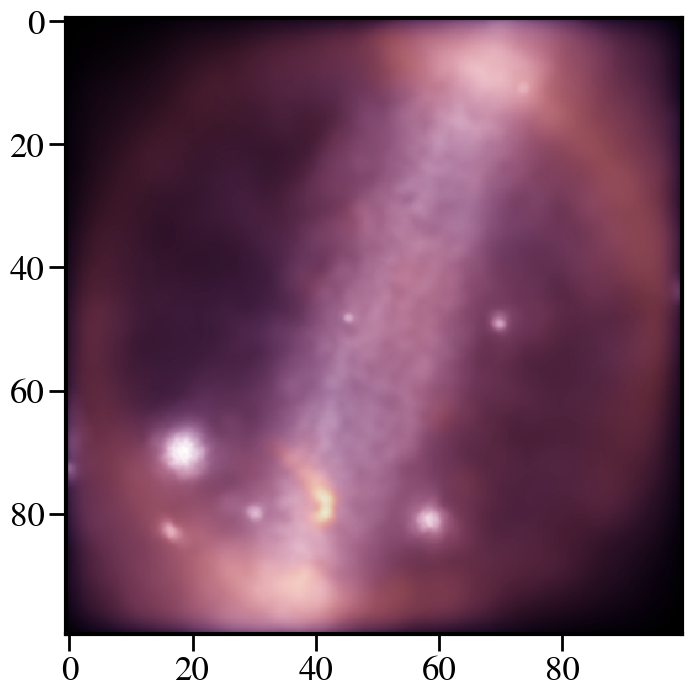

In [8]:
# # Assuming get_normalized_image is a function you've defined elsewhere
# sb = anal.Simba('PC39BP4', size=25)
# snapfile = sb.get_sim_file(149)
# catfile  = sb.get_caesar_file(149)

# ds = yt.load(snapfile)
# obj = caesar.load(catfile)
# ad = ds.all_data()

# gal = obj.galaxies[10]
# gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
# star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value

# hcoord = gal.minpotpos.in_units('kpc').value

# extent=50 #this is like the 'width' parameter in yt projection plots
import matplotlib.animation as animation
import matplotlib


# Set up the figure and axis
fig, ax = plt.subplots()

# Initialize the display object
image_display = ax.imshow(np.zeros((100, 100, 3)), interpolation='none')

def init():
    """Initialization function for the animation."""
    image_display.set_data(np.zeros((100, 100, 3)))  
    return [image_display]

def update(p):
    """Update function for each frame."""
    cmap_dm = matplotlib.cm.Greys_r
    cmap_gas = matplotlib.cm.magma

    qv_gas = QuickView(gas_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    qv_drk = QuickView(star_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    
    img_gas = qv_gas.get_image()
    img_drk = qv_drk.get_image()

    rgb_dm = cm.Greys_r(get_normalized_image(img_drk))
    rgb_gas = cm.magma(get_normalized_image(img_gas))

    blend = Blend.Blend(rgb_dm, rgb_gas)
    rgb_output = blend.Overlay()

    # Update the image display
    image_display.set_data(rgb_output)
    
    return [image_display]

# Create the animation
anim = animation.FuncAnimation(
    fig, 
    update, 
    init_func=init, 
    frames=360,
    interval=20,
    blit=True
)

# Save the animation as a GIF file
anim.save('output_animation_subset.gif', writer='pillow', fps=20)
print('Done animation!')


In [ ]:
# # Assuming get_normalized_image is a function you've defined elsewhere
# sb = anal.Simba('PC39BP4', size=25)
# snapfile = sb.get_sim_file(149)
# catfile  = sb.get_caesar_file(149)

# ds = yt.load(snapfile)
# obj = caesar.load(catfile)
# ad = ds.all_data()

# gal = obj.galaxies[10]
# gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
# star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value

# hcoord = gal.minpotpos.in_units('kpc').value

# extent=50 #this is like the 'width' parameter in yt projection plots
import matplotlib.animation as animation
import matplotlib


# Set up the figure and axis
fig, ax = plt.subplots()

# Initialize the display object
image_display = ax.imshow(np.zeros((100, 100, 3)), interpolation='none')

def init():
    """Initialization function for the animation."""
    image_display.set_data(np.zeros((100, 100, 3)))  
    return [image_display]

def update(p):
    """Update function for each frame."""
    cmap_dm = matplotlib.cm.Greys_r
    cmap_gas = matplotlib.cm.magma

    qv_gas = QuickView(gas_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    qv_drk = QuickView(star_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    
    img_gas = qv_gas.get_image()
    img_drk = qv_drk.get_image()

    rgb_dm = cm.Greys_r(get_normalized_image(img_drk))
    rgb_gas = cm.magma(get_normalized_image(img_gas))

    blend = Blend.Blend(rgb_dm, rgb_gas)
    rgb_output = blend.Overlay()

    # Update the image display
    image_display.set_data(rgb_output)
    
    return [image_display]

# Create the animation
anim = animation.FuncAnimation(
    fig, 
    update, 
    init_func=init, 
    frames=360,
    interval=20,
    blit=True
)

# Save the animation as a GIF file
anim.save('output_animation_subset.gif', writer='pillow', fps=20)
print('Done animation!')


In [18]:
import matplotlib.pyplot as plt
import h5py
from sphviewer.tools import camera_tools

P = sph.Particles(gas_pos, gas_mass)
S = sph.Scene(P)

cm_1 = [x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68]

targets = [cm_1]

anchors = {}
anchors['sim_times'] = [0.0, 1.0, 'pass', 3.0, 'same','same','same']
anchors['id_frames'] =  [0,180,750,840,930,1500,1680]
anchors['r']         =  [2,'same','same','same','same','same','same']
anchors['id_targets']=  [0,1,'same','pass',0,'same',1]
anchors['t']         = [0,'same','same','same','same','same',0]
anchors['p']         = [0,'same','same','same','same','same','same']
anchors['zoom']      = [1.,'same','same','same','same','same','same']
anchors['extent']    = [10, 'same','same','same','same','same',30]

data = camera_tools.get_camera_trajectory(targets,anchors)

h = 0
for i in data:
    i['xsize'] = 250
    i['ysize'] = 250
    i['roll'] = 0
    S = sph.Scene(P)
    S.update_camera(**i)
    R = sph.Render(S)
    img = R.get_image()
    R.set_logscale()
    plt.imsave('img/image_'+str('%04d.png'%h), img, vmin=0, vmax=6, cmap='cubehelix')
    h += 1

(6, 100)


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sphviewer as sph
from sphviewer.tools import camera_tools
import yt
import caesar as ca

# Initialize your Simba analysis
sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(129)
catfile  = sb.get_caesar_file(129)

# Load the snapshot and caesar catalog
ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = obj.galaxies[3]

# Extract gas positions and masses for the galaxy
star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
star_mass = ad['PartType4', 'Masses'][gal.slist].in_units('Msun').value

h1_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
h1_mass = ds.arr(ad['PartType0', 'GrackleHI'][gal.glist], 'code_mass').in_units('Msun').value

d_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
d_mass = ds.arr(ad['PartType0', 'Dust_Masses'][gal.glist], 'code_mass').in_units('Msun').value

hcoord = gal.minpotpos.in_units('kpc').value

L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
p = np.rad2deg(np.arccos(cos_phi))


# Create Particles objects for gas and stars
P_gas = sph.Particles(h1_pos, h1_mass)
P_star = sph.Particles(star_pos, star_mass)
P_dust  = sph.Particles(d_pos, d_mass)

# Create Particles object
P = sph.Particles(gas_pos, gas_mass)

# Define the center of the particle distribution as the target
center = gal.pos.in_units('kpc').value
targets = [center]

# Number of frames in the GIF
num_frames = 100

# Define anchors for camera trajectory (rotating around z-axis)
anchors = {
    'sim_times': np.linspace(0, 1, num_frames),
    'id_frames': np.arange(num_frames),
    'r': [35] * num_frames,  # Fixed distance
    'id_targets': [0] * num_frames,  # Always target the center (index 0)
    't': np.linspace(0, 360, num_frames),  # Rotate azimuthally
    'p': np.linspace(0, 360, num_frames), #[p] * num_frames,  # Fixed polar angle (45 degrees)
    'zoom': [1.0] * num_frames,  # No zoom change
    'extent': [10] * num_frames  # Fixed extent
}

# Get camera trajectory
data = camera_tools.get_camera_trajectory(targets, anchors)

# Ensure output directory exists
if not os.path.exists('img'):
    os.makedirs('img')

# Initialize counter for image file names
h = 0

# Render images based on the camera trajectory
for i in data:
    i['xsize'] = 1000
    i['ysize'] = 1000
    i['roll'] = p  # No roll

    # Render gas particles
    S_gas = sph.Scene(P_gas)
    S_gas.update_camera(**i)
    R_gas = sph.Render(S_gas)
    img_gas = R_gas.get_image()
    R_gas.set_logscale()
    
    # Render star particles
    S_star = sph.Scene(P_star)
    S_star.update_camera(**i)
    R_star = sph.Render(S_star)
    img_star = R_star.get_image()
    R_star.set_logscale()
    
    # Render dust particles
    S_dust = sph.Scene(P_dust)
    S_dust.update_camera(**i)
    R_dust = sph.Render(S_dust)
    img_dust = R_dust.get_image()
    R_dust.set_logscale()

    rgb_star  = cm.Greys_r(get_normalized_image(img_star))
    rgb_gas = cm.magma(get_normalized_image(img_gas))
    rgb_dust = cm.inferno_r(get_normalized_image(img_dust))

    blend = Blend.Blend(rgb_star, rgb_gas)
    output = blend.Screen()
    
    plt.imsave('img/image_' + str('%04d.png' % h), output)
    h += 1

print("Images saved successfully.")


yt : [INFO     ] 2024-08-25 16:05:54,047 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-25 16:05:54,047 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-25 16:05:54,068 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-25 16:05:54,068 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-25 16:05:54,069 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-25 16:05:54,069 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-25 16:05:54,069 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: omega_radiation     

Images saved successfully.


In [119]:
from PIL import Image
import os

# Directory where images are stored
image_dir = 'img/'

# Output GIF file
output_gif = 'output_animation.gif'

# Get a sorted list of image files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# Load images into a list
images = [Image.open(os.path.join(image_dir, file)) for file in image_files]

# Save as GIF
images[0].save(
    output_gif,
    save_all=True,
    append_images=images[1:],  # Append the rest of the images
    duration=100,  # Duration between frames in milliseconds
    loop=0  # Loop forever; use 1 to loop once
)

print(f"GIF saved as {output_gif}")


GIF saved as output_animation.gif
